In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

In [57]:
df = pd.read_pickle('BASE PREPARADA MODELO.pkl')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 56 to 98373
Columns: 201 entries, target to MEPP_y_1
dtypes: float64(13), int8(188)
memory usage: 5.7 MB


In [59]:
ratio = 0.30

In [60]:
############### Com balanceamento com 3 classes###############

# Cria objeto SMOTE
smote = SMOTE(random_state=42)

# Realiza oversampling das classes minoritárias
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifica distribuição das classes após oversampling
print('Distribuição das classes após oversampling:', Counter(y_resampled))

#Data split into train and test:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=ratio)

Distribuição das classes após oversampling: Counter({0: 16883, 1: 16883})


In [61]:
num_hidden_layers =  3
num_neurons =  64
learning_rate = 0.001
batch_size = 64
epochs = 100

In [62]:
# Build the neural network model
model = Sequential()
model.add(Dense(num_neurons, input_dim=X_train_re.shape[1], activation='relu'))
for i in range(num_hidden_layers - 1):
    model.add(Dense(num_neurons, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and evaluate its performance on the validation set
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_re, y_train_re, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_test_re, y_test_re), callbacks=[early_stopping])
val_loss = np.min(history.history['val_loss'])

Epoch 1/100
370/370 [==============================] - 2s 4ms/step - loss: 0.6037 - accuracy: 0.6602 - val_loss: 0.5585 - val_accuracy: 0.7021
Epoch 2/100
370/370 [==============================] - 1s 3ms/step - loss: 0.5361 - accuracy: 0.7242 - val_loss: 0.5208 - val_accuracy: 0.7400
Epoch 3/100
370/370 [==============================] - 1s 3ms/step - loss: 0.5029 - accuracy: 0.7479 - val_loss: 0.4954 - val_accuracy: 0.7550
Epoch 4/100
370/370 [==============================] - 1s 3ms/step - loss: 0.4794 - accuracy: 0.7626 - val_loss: 0.4829 - val_accuracy: 0.7650
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.7765 - val_loss: 0.4625 - val_accuracy: 0.7797
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.7836 - val_loss: 0.4527 - val_accuracy: 0.7822
Epoch 7/100
370/370 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.7949 - val_loss: 0.4449 - val_accuracy: 0.7889

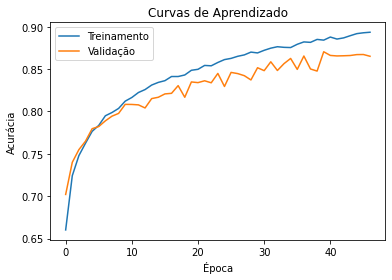

In [63]:
import matplotlib.pyplot as plt

# plotar as curvas de aprendizado
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curvas de Aprendizado')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()


In [64]:
# Printing out model metric reports
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_re)
y_pred_classes = (y_pred > 0.5).astype(int)
print(classification_report(y_test_re, y_pred_classes))

317/317 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      5107
           1       0.83      0.92      0.87      5023

    accuracy                           0.87     10130
   macro avg       0.87      0.87      0.86     10130
weighted avg       0.87      0.87      0.86     10130



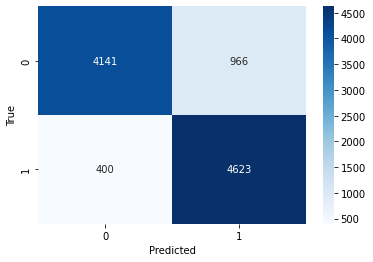

In [65]:
# gerar a matriz de confusão
#cm = confusion_matrix(y_pred_classes, y_pred_classes)

cm = confusion_matrix(y_test_re, y_pred_classes)
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
# avaliar a rede neural nos dados de treinamento e validação
train_scores = model.evaluate(X_train_re, y_train_re, verbose=0)
val_scores = model.evaluate(X_train_re, y_test_re, verbose=0)

# imprimir as métricas de avaliação
print('Acurácia de Treinamento: %.2f%%' % (train_scores[1]*100))
print('Acurácia de Validação: %.2f%%' % (val_scores[1]*100))

ValueError: Data cardinality is ambiguous:
  x sizes: 23636
  y sizes: 10130
Make sure all arrays contain the same number of samples.